In [1]:
import pandas as pd
import altair as alt

alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [2]:
df = pd.read_csv('../data/cleaned_data.csv',
                 usecols=['points', 'title', 'description', 'price',
                           'designation', 'variety', 'winery', 'county',
                           'county_id', 'state_id', 'value','value_scaled', 'state'])

## DRAFT GRAPE VARIETY HEATMAPS

In [3]:
# how many grape varieties do we get if we drop those with fewer than 100, 500, 1000 observations
variety_df = df.groupby(['variety']).size().reset_index(name='counts')
variety_df = variety_df.sort_values(by='counts')
print("Greater than 100 observations:", len(variety_df.query('counts > 100')))
print("Greater than 500 observations:",len(variety_df.query('counts > 500')))
print("Greater than 1000 observations:", len(variety_df.query('counts > 1000')))

Greater than 100 observations: 35
Greater than 500 observations: 19
Greater than 1000 observations: 10


In [4]:
# filter data for grape varieties with more than 500 observations
popular_varieties = variety_df.query('counts > 500')['variety']
varieties_chart_data = df[df['variety'].isin(popular_varieties.tolist())]

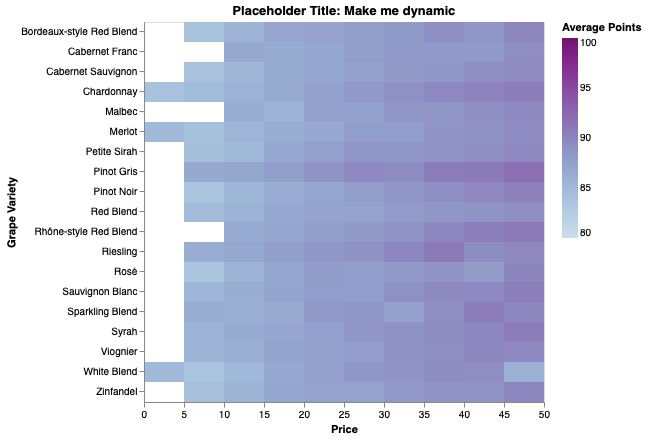

In [10]:
heatmap_1 = alt.Chart(varieties_chart_data.query('price < 50')).mark_rect().encode(
                    x=alt.X('price:Q',
                              bin=alt.Bin(maxbins=20),
                              title="Price"),
                     y=alt.Y('variety:O', 
                             title="Grape Variety"),
                     color=alt.Color('average(points):Q',
                                     scale=alt.Scale(scheme="bluepurple",
                                     domain=[80, 100]),
                     legend=alt.Legend(
                                     orient='right', title="Average Points")
                                    ),
                     tooltip=['average(points)','average(price)','average(value)', 'count(title)']
).properties(title="Placeholder Title: Make me dynamic").configure_axis(grid=False, labelAngle = 0) 

heatmap_1

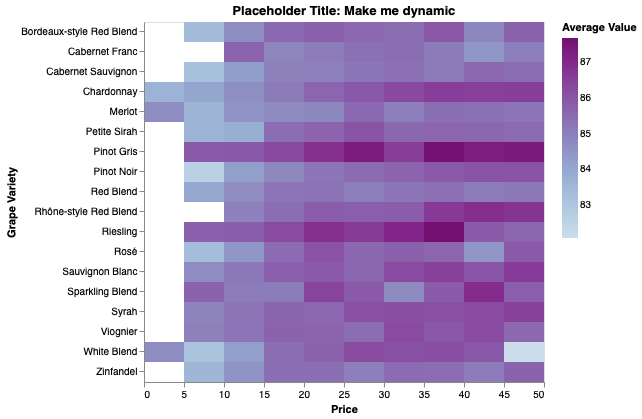

In [6]:
heatmap_2 = alt.Chart(varieties_chart_data.query('price < 50')).mark_rect().encode(
                    x=alt.X('price:Q',
                              bin=alt.Bin(maxbins=10),
                              title="Price"),
                     y=alt.Y('variety:O', 
                             title="Grape Variety"),
                     color=alt.Color('average(value_scaled):Q',
                                     scale=alt.Scale(scheme="bluepurple"),
                     legend=alt.Legend(
                                     orient='right', title="Average Value")
                                    ),
                     tooltip=['average(points)','average(price)','average(value_scaled)', 'count(title)']
).properties(title="Placeholder Title: Make me dynamic")

heatmap_2

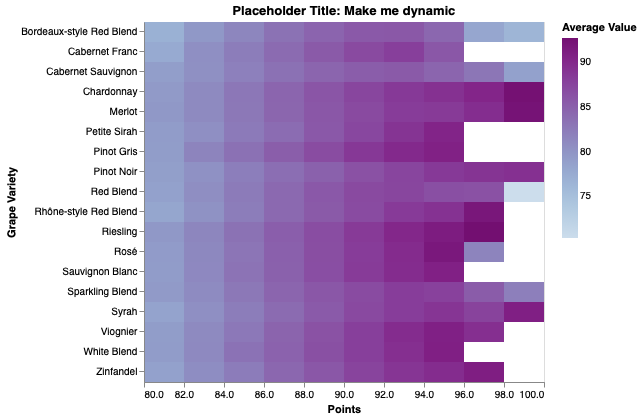

In [14]:
heatmap_3 = alt.Chart(varieties_chart_data).mark_rect().encode(
                    x=alt.X('points:Q',
                              bin=alt.Bin(maxbins=10),
                              title="Points"),
                     y=alt.Y('variety:O', 
                             title="Grape Variety"),
                     color=alt.Color('average(value_scaled):Q',
                                     scale=alt.Scale(scheme="bluepurple"),
                     legend=alt.Legend(
                                     orient='right', title="Average Value")
                                    ),
                     tooltip=['average(points)','average(price)','average(value_scaled)', 'count(title)']
).properties(title="Placeholder Title: Make me dynamic")

heatmap_3

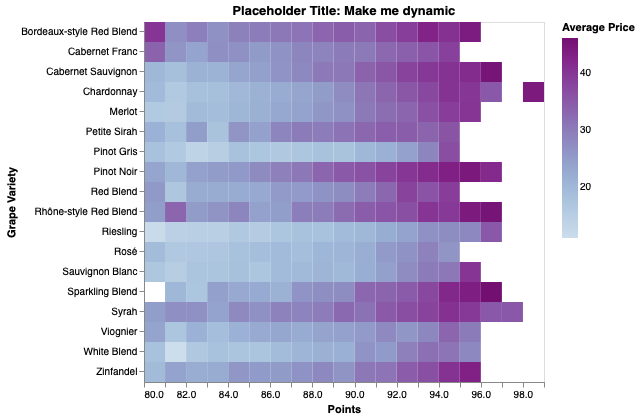

In [8]:
heatmap_4 = alt.Chart(varieties_chart_data.query('price < 50')).mark_rect().encode(
                    x=alt.X('points:Q',
                              bin=alt.Bin(maxbins=20),
                              title="Points"),
                     y=alt.Y('variety:O', 
                             title="Grape Variety"),
                     color=alt.Color('average(price):Q',
                                     scale=alt.Scale(scheme="bluepurple"),
                     legend=alt.Legend(
                                     orient='right', title="Average Price")
                                    ),
                     tooltip=['average(points)','average(price)','average(value_scaled)', 'count(title)']
).properties(title="Placeholder Title: Make me dynamic")
heatmap_4

## DRAFT WINERIES HEATMAPS

In [9]:
# how many wineries do we get if we drop those with fewer than 10, 50 or 100 observations
winery_df = df.groupby(['winery']).size().reset_index(name='counts')
winery_df = winery_df.sort_values(by='counts')
print("Greater than 10", len(winery_df.query('counts > 10')))
print("Greater than 50",len(winery_df.query('counts > 50')))
print("Greater than 100", len(winery_df.query('counts > 100')))

Greater than 10 1331
Greater than 50 162
Greater than 100 16


In [10]:
# filter data for wineries with more than 100 reviews
popular_wineries = winery_df.query('counts > 100')['winery']
wineries_chart_data = df[df['winery'].isin(popular_wineries.tolist())]

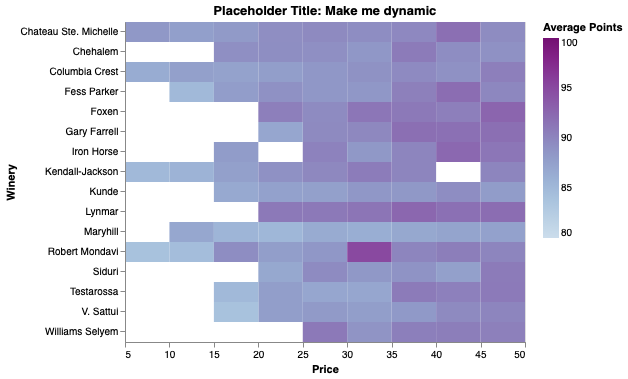

In [11]:
heatmap_5 = alt.Chart(wineries_chart_data.query('price < 50')).mark_rect().encode(
                    x=alt.X('price:Q',
                              bin=alt.Bin(maxbins=10),
                              title="Price"),
                     y=alt.Y('winery:O', 
                             title="Winery"),
                     color=alt.Color('average(points):Q',
                                     scale=alt.Scale(scheme="bluepurple",
                                     domain=[80, 100]),
                     legend=alt.Legend(
                                     orient='right', title="Average Points")
                                    ),
                     tooltip=['average(points)','average(price)','average(value_scaled)', 'count(title)']
).properties(title="Placeholder Title: Make me dynamic")

heatmap_5